导包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

加载数据

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

划分训练集(70%)和测试集(30%)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

正则化

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

逻辑回归模型

In [5]:
lr = LogisticRegression(C=1000.0,random_state=0,solver='lbfgs')
lr.fit(X_train,y_train)

LogisticRegression(C=1000.0, random_state=0)

交叉验证

In [6]:
cv_score = cross_val_score(lr,X_train,y_train,cv=5,scoring='accuracy')
print(f'5折交叉验证准确率:{cv_score.mean():.4f} ± {cv_score.std():.4f}')

5折交叉验证准确率:0.9524 ± 0.0301


计算混淆矩阵和召回率

In [7]:
y_pred = lr.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)
print("\n混淆矩阵:\n",conf_matrix)
print("\n召回率:\n",class_report)


混淆矩阵:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

召回率:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



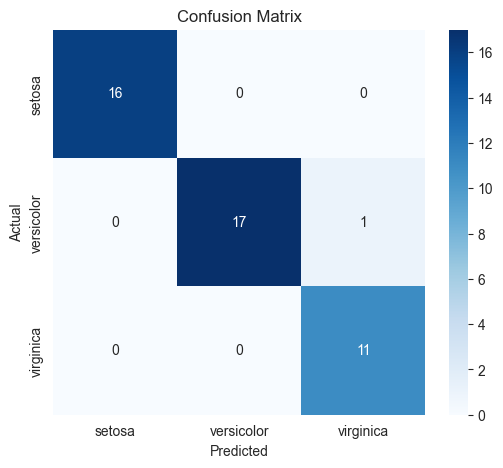

In [8]:
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='d',xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()